In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import sklearn as sl
from sklearn import tree
import networkx as nx
from sklearn.tree import DecisionTreeRegressor
import time
from progress.bar import Bar
from tqdm import tqdm_notebook as tqdm
from sklearn.ensemble import RandomForestRegressor


### Importing and normalising data

In [3]:
data=sc.read_h5ad('../../../AnnData/Data_Ann/12-Michaela-anndata-SB1-8_formated.h5ad')


/opt/conda/lib/python3.8/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [ ]:
day=[]
cata=np.unique(data.obs["Condition_Day"])[:-1]
for j in range(6,7):
    # remove gene not used for a specific day and normalising the data after
    data_1=data[data.obs["Condition_Day"]==cata[j],:];
    data1=data_1[:,data_1.X.sum(axis=0)!=0].copy();
    data2=data1[data1.X.sum(axis=1)!=0,:].copy();
    data2.X= sl.preprocessing.normalize(data2.X, norm='l1', axis=1);
    #creating and sveing matrixes use to store values 
    N=len(data2.X.T);
    depth=np.zeros(N)
    A=np.zeros((N,N));
    np.save("label_"+str(j)+".npy",np.array(data2.var["Info_Raw Data Input"]))
    # import matrix of the person correlation to speed up the computaion but also increase accuracy
    A1=np.load("../pearson/A"+str(j)+".npy")
    A1=A1-np.eye(len(A1))
    A1=np.where(np.abs(A1)>0.005,A1,0)
    weight=np.zeros(N)
    #fit a regression tree with all genes besides the gene fitet to as input
    for i in tqdm(range(0,N)):
        in_dex=np.nonzero(A1[:,i])[0]
        clf=DecisionTreeRegressor();
        X=data2.X[:,in_dex].copy();
        clf.fit(X,data2.X[:,i]);
        Index=np.nonzero(clf.feature_importances_)[0]
        weight[in_dex]=clf.feature_importances_
        depth[i]=clf.get_depth()
        #store the feature importants in a adjecency matrix
        A[Index,i]=weight[Index]
    np.save("depths"+str(j),depth)
    np.save("day_norm_before_"+str(j)+"impureity",A)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
<ipython-input-7-ca9c2630b17d>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(0,N)):


  0%|          | 0/20829 [00:00<?, ?it/s]

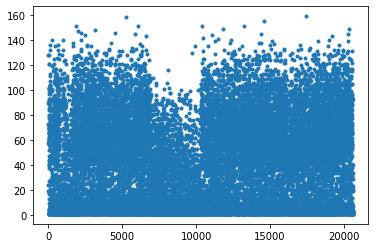

In [6]:
d4=np.load("depths5.npy")
plt.plot(d4,'.')

In [3]:
cata=np.array(["day3","day4","day5","day6","day6.5","day7.5","day8.5","day9.5"])

In [3]:
cata=np.array(["day3","day4","day5","day6","day6.5","day7.5","day8.5","day9.5"])
for i in range(0,8):
    labels1=np.load("label_"+str(i)+".npy",allow_pickle=True)
    A=np.load("day_norm_before_"+str(i)+"Depth10_10.npy")
    G=nx.DiGraph(A)
    G = nx.relabel_nodes(G,dict(zip(G,labels1)))
    G.remove_nodes_from(list(nx.isolates(G)))
    nx.write_pajek(G,cata[i]+"_impurity_corr_2.1.net")
    nx.write_gexf(G,cata[i]+"_impurity_corr_2.1.gexf")

KeyboardInterrupt: 

In [ ]:
A1=np.load("day_norm_before_4Depth10.npy")